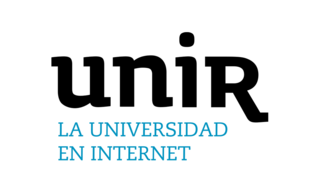

_Máster Universitario en Inteligencia Artificial_

_Trabajo Fin de Máster_

- Gustavo Mateos Santos
- gustavo.mateos830@comunidadunir.net

# Clasificación automática de estrellas variables con modelos Transformer aplicados a series temporales



In [2]:
# Install missing packages
%pip install torch lightkurve

  Using cached torch-2.7.0-cp311-cp311-win_amd64.whl.metadata (29 kB)
  Using cached lightkurve-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached astropy-7.0.2-cp311-cp311-win_amd64.whl.metadata (10 kB)
  Using cached astroquery-0.4.10-py3-none-any.whl.metadata (6.3 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached bokeh-3.7.3-py3-none-any.whl.metadata (12 kB)
  Using cached fbpca-1.0-py3-none-any.whl
  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached memoization-0.4.0-py3-none-any.whl
  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached oktopus-0.1.2-py

In [1]:
import torch, lightkurve as lk

print("Torch:", torch.__version__)
print("Lightkurve:", lk.__version__)

Torch: 2.7.0+cpu
Lightkurve: 2.5.0


In [1]:
from src.download_curves import download_from_csv

# Descargar todas las curvas listadas en el CSV
download_from_csv("data/star_list.csv")


Descargando KIC 11446443 (Kepler)...
Guardando KIC 11446443 (Kepler)...
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_11446443__2009-09-18T17-05-16.193Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_11446443__2009-05-02T00-40-13.625Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_11446443__2009-11-21T00-22-00.103Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_11446443__2009-05-13T00-01-07.139Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_11446443__2009-06-20T00-10-27.141Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_11446443__2009-07-20T19-42-24.964Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_11446443__2009-08-20T20-38-02.821Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\kepler\kepler_1144644

Guardando TIC 167692429 (TESS)...
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2018-07-25T19-00-55.814.csv
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2018-08-23T14-32-46.448.csv
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2018-09-20T12-46-49.534.csv
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2018-10-19T09-35-04.287.csv
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2018-12-15T18-27-53.487.csv
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2019-05-21T11-09-36.746.csv
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2019-04-23T06-38-01.809.csv
⚠️ 167692429 no tiene PDCSAP_FLUX, usando SAP_FLUX
✅ Guardado: data\tess\tess_167692429__2019-03-26T22-28-19.798.csv
⚠️ 167692429 no tiene PDCSAP_F

No data found for target "TIC 140924508".


Guardando TIC 140924508 (TESS)...
❌ Error con 140924508 (TESS): 'NoneType' object is not iterable


c:\Users\hav3f\anaconda3\envs\astro_transformer\Lib\site-packages\lightkurve\search.py:495: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


| Fuente       | Misión | Etiquetado | Tipo         | Método de acceso                   |
| ------------ | ------ | ---------- | ------------ | ---------------------------------- |
| Kepler EB    | Kepler | Sí         | Binaries     | NASA Exoplanet Archive / Villanova |
| K2VARCAT     | K2     | Sí         | Multiclase   | MAST HLSP                          |
| TESS-SVC     | TESS   | Semi       | Variabilidad | MAST HLSP                          |
| TESS-EB      | TESS   | Sí         | EB continuas | MAST HLSP                          |
| VSX (AAVSO)  | Todos  | Sí         | Multiclase   | AAVSO + MAST                       |
| Gaia DR3 Var | Todos  | Sí         | Multiclase   | ESA Gaia Archive                   |

Diseño del esquema del dataset. Vamos a unificar las curvas descargadas en un dataset estructurado tipo CSV/Parquet con este esquema mínimo:

| id\_mision | id\_objeto | mision | clase\_variable | fecha\_inicio | fecha\_fin | tiempo | magnitud | error | origen\_etiqueta |
| ---------- | ---------- | ------ | --------------- | ------------- | ---------- | ------ | -------- | ----- | ---------------- |

Estrategia de implementación técnica
Podemos hacerlo en varias etapas:

- Script 1: descarga de curvas etiquetadas de Kepler EB y TESS-EB (usando ID + clase desde CSV original)
- Script 2: procesamiento de K2VARCAT (CSV disponible con clase + ID)
- Script 3: combinación cruzada entre TIC (TESS Input Catalog) y VSX (requiere posiciones celestes + nombre)
- Script 4: cruce de Gaia DR3 variables con coordenadas de Kepler/K2/TESS
- Script 5: exportación consolidada en formato CSV/Parquet final con clases normalizadas

#### Prueba del primer script de descarga de datos 


In [ ]:
# 1) Lanzando el script de ejemplo directamente
# !python src/script_1_eb.py

# Asegurarse de que el directorio 'src' esté en el path de Python
import sys
from pathlib import Path

src_path = Path("src").resolve()
if src_path not in sys.path:
    sys.path.append(str(src_path))

# Ejecutar el script que prepara y descarga el dataset de prueba
from src.script_1_eb import main as run_script_1
run_script_1()

# Cargar y explorar el resultado
import pandas as pd
from pathlib import Path

dataset_path = Path("data/processed/dataset_eb.parquet")
if dataset_path.exists():
    df = pd.read_parquet(dataset_path)
    display(df.head())

    n_estrellas = df["id_objeto"].nunique()
    n_filas = df.shape[0]

    print(f"[✓] Número de estrellas descargadas y consolidadas: {n_estrellas}")
    print(f"[✓] Total de filas (puntos de curva): {n_filas:,}")

    curvas_por_estrella = df["id_objeto"].value_counts()
    print(f"[✓] Curvas por estrella (máx): {curvas_por_estrella.max()}")

    # Conteo por clase (en este caso todas deberían ser 'EB')
    print("\n[✓] Recuento por clase_variable:")
    print(df.groupby("clase_variable")["id_objeto"].nunique())

else:
    print("[⚠️] El archivo Parquet no se encontró. ¿Falló la descarga o consolidación?")

[⬇] Descargando catálogos de pruebas de Kepler y TESS...
[⬇] Descargando catálogo reducido de Kepler EB para pruebas...
[⬇] Descargando catálogo reducido de TESS EB para pruebas...
[⬇] Generando CSV de entrada para descarga de curvas...
[⬇] Descargando curvas de luz...
[⬇] Descargando 10 curvas de luz...


⬇ Descargando curvas:   0%|          | 0/10 [00:00<?, ?it/s]

Descargando KIC 11446443 (Kepler)...
[🌓] KIC 11446443 → 53 curvas encontradas


⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-09-18T17-05-16.193Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-05-02T00-40-13.625Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-11-21T00-22-00.103Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-05-13T00-01-07.139Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-06-20T00-10-27.141Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-07-20T19-42-24.964Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-08-20T20-38-02.821Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-10-19T21-56-17.780Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-09-18T17-05-16.190Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-05-02T00-40-13.639Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-06-20T00-10-27.146Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-05-13T00-01-07.136Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-11-23T14-46-39.096Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-10-24T12-53-56.913Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-09-23T15-53-41.741Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-08-23T16-26-19.341Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-07-22T20-52-34.804Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-06-24T22-29-26.397Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-03-20T23-32-33.050Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-04-22T18-38-40.952Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-12-19T20-49-13.622Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-05-21T02-20-53.080Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-03-20T23-32-33.055Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-06-24T22-29-26.393Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2010-09-23T15-53-41.738Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2009-12-19T20-49-13.619Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-08-29T13-48-19.092Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-10-31T12-44-49.198Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-09-29T16-41-37.194Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-07-28T06-57-46.953Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-03-21T00-09-42.472Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-05-26T06-03-35.108Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-04-27T02-44-24.182Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-06-27T07-59-49.869Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-06-27T07-59-49.865Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2011-03-21T00-09-42.477Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2012-11-06T18-28-45.440Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


✅ Guardado: data\raw\kepler\kepler_11446443__sap_2012-10-05T23-24-24.397Z.csv
⚠️ 11446443 no tiene PDCSAP_FLUX, usando SAP_FLUX


# 📥 Descarga y consolidación de curvas EB (entorno local o SageMaker)
Esta sección permite ejecutar el script `script_1_eb.py`, ya sea con el catálogo completo (en SageMaker) o con una muestra reducida (en local), y verificar el resultado consolidado.

In [ ]:
import platform
from src.script_1_eb import main as run_script_1

# Detectar entorno
if "sagemaker" in platform.node().lower():
    print("🔁 Ejecutando en SageMaker")
    run_script_1(use_sample=False)  # catálogo completo
else:
    print("💻 Ejecutando en entorno local")
    run_script_1(use_sample=True)   # catálogo reducido para prueba

In [ ]:
import pandas as pd
from pathlib import Path
from IPython.display import display

df_path = Path("data/processed/dataset_eb.parquet")

if df_path.exists():
    df = pd.read_parquet(df_path)
    n_estrellas = df['id_objeto'].nunique()
    n_filas = len(df)
    print(f"[✓] {n_estrellas} estrellas - {n_filas:,} puntos de curva")
    display(df.head())
    print("\n[✓] Curvas por estrella (top 5):")
    display(df['id_objeto'].value_counts().head())
    print("\n[✓] Recuento por clase:")
    display(df.groupby('clase_variable')['id_objeto'].nunique())
else:
    print("⚠️ El archivo aún no se ha generado o está mal ubicado.")